# ML Project : Predicting Term Deposit Subscription Using Bank Marketing Data

## Project Introduction 
In the highly competitive banking sector, marketing campaigns are essential for promoting financial products like term deposits. However, these campaigns often result in low success rates, making it crucial for banks to identify and target the right customers more effectively.

This project focuses on building a machine learning classification model to predict whether a customer will subscribe to a term deposit (yes or no) based on historical data collected from direct marketing efforts by a Portuguese bank. The dataset, sourced from the UCI Machine Learning Repository, includes a wide range of features such as:

* **Customer details :** age, job, marital status, education
* **Contact information :** contact type, day, duration
* **Campaign history :** number of contacts, previous outcomes
* **Economic context :** consumer confidence, employment variation rate

### Project Objective
The main goal of this project is to develop and evaluate classification models that can:

* Predict a customer’s likelihood of subscribing to a term deposit
* Identify key factors that influence customer decisions
* Support marketing teams in improving campaign efficiency and reducing costs

## Dataset Overview
The dataset used in this project is the Bank Marketing Dataset from the UCI Machine Learning Repository. It contains information collected from direct marketing campaigns of a Portuguese banking institution.

* **Source:** UCI Machine Learning Repository
* **Number of Records (Rows):** 45,211
* **Number of Features (Columns):** 17 input features + 1 target variable
* **Target Variable:** y – Indicates if the client subscribed to a term deposit (yes or no)
* **Feature Types:** Mixed — includes both categorical and numerical variables
* **Missing Values:** No missing values, but some features contain 'unknown' as a placeholder
* **Period of Data Collection:** From May 2008 to November 2010
* **Application Domain:** Marketing and Finance
* **Machine Learning Task:** Binary Classification

### Feature Details

**1. Client Information**
* age: Age of the client (numerical)  
* job: Type of job (categorical – e.g., admin., technician, management, etc.)  
* marital: Marital status (categorical – e.g., single, married, divorced)  
* education: Education level (categorical)  
* default: Has credit in default? (yes, no, unknown)  
* housing: Has a housing loan? (yes, no, unknown)  
* loan: Has a personal loan? (yes, no, unknown)  

**2. Last Contact Information**
* contact: Type of communication (categorical – cellular or telephone)  
* month: Last contact month (categorical – e.g., may, jun, nov)  
* day_of_week: Last contact day of the week (categorical)  
* duration: Duration of the last contact (in seconds) – very influential but only known after the call

**3. Campaign Information**
* campaign: Number of contacts performed during this campaign (numeric)  
* pdays: Days since the client was last contacted from a previous campaign (-1 means never contacted)  
* previous: Number of contacts performed before this campaign  
* poutcome: Outcome of the previous marketing campaign (success, failure, nonexistent)

**4. Socioeconomic Indicators**
* emp.var.rate: Employment variation rate (numeric – quarterly indicator)  
* cons.price.idx: Consumer price index (numeric – monthly indicator)  
* cons.conf.idx: Consumer confidence index (numeric – monthly indicator)  
* euribor3m: Euribor 3-month rate (numeric)  
* nr.employed: Number of employees (numeric – quarterly indicator)

**5. Target Variable**
* y: Indicates if the client subscribed to a term deposit (yes or no)

### Import Necessary Libraries

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

### Load the Dataset
Read the CSV using pandas.read_csv(), with sep=';' since it uses semicolon as delimiter

In [9]:
# Load the dataset from a CSV file
data = pd.read_csv('bank-additional-full.csv', sep=';')
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


pd.read_csv('bank-additional-full.csv', sep=';')   
Loads the dataset. The bank dataset uses a semicolon (;) as the delimiter, so it's important to specify sep=';'.  
Make sure the CSV file is in your working directory, or provide the full path if it's stored elsewhere.

df.head()   
Shows the top 5 records to give you an initial look at the dataset structure.

### Data Exploration

* Checking basic info (column names, data types, non-null counts)
* Getting dataset shape (rows & columns)
* Checking for missing or unusual values (like 'unknown')

In [12]:
# View sample records
print('First 5 rows:')
data.head()

First 5 rows:


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [13]:
print('Last 5 rows:')
data.tail()

Last 5 rows:


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


In [14]:
# Check shape of the dataset
print(f"Dataset shape: {data.shape}")

Dataset shape: (41188, 21)


In [15]:
# Column names
print("Column Names:")
print(data.columns.tolist())

Column Names:
['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y']


In [22]:
# View unique values in each columns
print(" Unique Values Per Column:")
print(data.nunique())

 Unique Values Per Column:
age                 78
job                 12
marital              4
education            8
default              3
housing              3
loan                 3
contact              2
month               10
day_of_week          5
duration          1544
campaign            42
pdays               27
previous             8
poutcome             3
emp.var.rate        10
cons.price.idx      26
cons.conf.idx       26
euribor3m          316
nr.employed         11
y                    2
dtype: int64


In [24]:
# View column names, data types and non-null counts
print(" Dataset Info:")
data.info()

 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   

In [26]:
# Check for missing values (nulls)
print(" Missing Values (NaN):")
print(data.isnull().sum())

 Missing Values (NaN):
age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


* Checks for missing values (NaN) in each column.
* In this dataset, there are no true NaN values, but some categorical features use 'unknown' to represent missing or unspecified data.

In [28]:
# Check how many 'unknown' values exist in each categorical column
print("Columns with 'unknown' values:")
columns = data.select_dtypes(include='object').columns
for col in columns:
    if 'unknown' in data[col].unique():
        print(f"{col}: {(data[col] == 'unknown').sum()}")

Columns with 'unknown' values:
job: 330
marital: 80
education: 1731
default: 8597
housing: 990
loan: 990


* Identifies columns with 'unknown' placeholders instead of missing values (NaN).
* Outputs the number of 'unknown' values in each relevant categorical column.
* This helps to decide whether to impute, drop, or encode these values later in preprocessing.

In [30]:
# Checking for duplicates
data.duplicated().sum()

12

In [32]:
# remove duplicates
data = data.drop_duplicates()

In [34]:
# Encode target variable
data['y'] = data['y'].map({'yes': 1, 'no': 0})

data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


* The target column y is originally categorical ('yes' or 'no').
* It is encoded into binary values: 1 for 'yes' and 0 for 'no', making it suitable for machine learning algorithms.

### Splitting dataset

In [38]:
X = data.drop(columns='y')  
y = data['y']

In [40]:
# 75% Training, 30% Temp (which will be split into validation and unseen)
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.30, random_state=42, stratify=y
)

In [42]:
# 15% Validation, 15% Unseen (from the 30% Temp set)
X_val, X_unseen, y_val, y_unseen = train_test_split(
    X_temp, y_temp, test_size=0.50, random_state=42, stratify=y_temp
)

* First, split 70% of the data for training.
* The remaining 30% is temporarily stored in X_temp and y_temp for further splitting.
* stratify=y ensures the class distribution is preserved in all splits.
* From the 30% temp set:
  * 15% becomes the validation set
  * 15% becomes the unseen test set

In [44]:
print(f"Training Set:   {X_train.shape}")
print(f"Validation Set: {X_val.shape}")
print(f"Unseen Set:     {X_unseen.shape}")

Training Set:   (28823, 20)
Validation Set: (6176, 20)
Unseen Set:     (6177, 20)


In [46]:
# Save the unseen/test data to a CSV file
X_unseen.to_csv("unseen_data.csv", index=False)

Saves the unseen test set to a CSV file so it can be used later for final model evaluation without data leakage.

In [48]:
# Saves the training feature set to the variable df for further preprocessing (e.g., encoding, scaling).
df = X_train

## Exploratory Data Analysis - EDA

In [51]:
# Summary statistics for numerical features
print(" Summary Statistics (Numerical):")
display(df.describe())

 Summary Statistics (Numerical):


,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,28823.000000,28823.000000,28823.000000,28823.000000,28823.000000,28823.000000,28823.000000,28823.000000,28823.000000,28823.000000
mean,39.996288,257.993269,2.559935,961.863893,0.174166,0.082080,93.575855,-40.497551,3.619378,5166.924397
std,10.416566,257.339331,2.753504,188.404108,0.498617,1.570991,0.579169,4.628444,1.735826,72.479587
min,17.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.000000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.000000,179.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.000000,4199.000000,56.000000,999.000000,6.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


* This code displays the descriptive statistics for all numerical columns in the training dataset df (which is X_train).
* The .describe() function provides a quick overview of each numerical feature, 

#### Target Variable Distribution
Understanding the distribution of the target variable is crucial in a classification problem, especially when dealing with imbalanced classes.

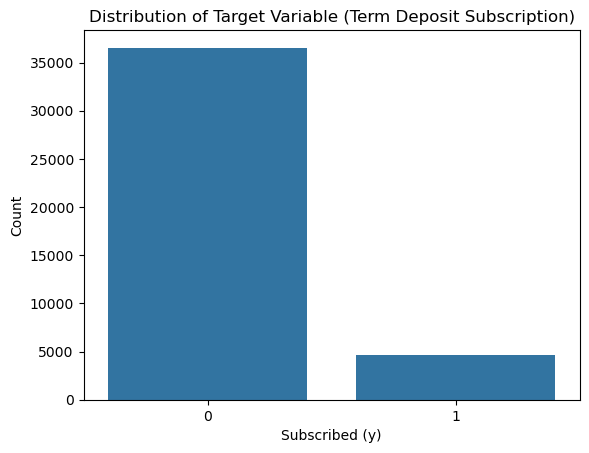

In [53]:
# Count plot

sns.countplot(x=y, data=df)
plt.title('Distribution of Target Variable (Term Deposit Subscription)')
plt.xlabel('Subscribed (y)')
plt.ylabel('Count')
plt.show()

* This bar plot visualizes the count of each class in the target variable y.
* The target variable has two classes:
  * 0: Client did not subscribe to a term deposit
  * 1: Client subscribed
* Useful to check class imbalance, which may affect model performance and require techniques like SMOTE 

In [55]:
# Show percentage distribution
print("\nTarget Variable Distribution:")
print(y.value_counts())
print("\nPercentage Distribution:")
print(y.value_counts(normalize=True) * 100)


Target Variable Distribution:
y
0    36537
1     4639
Name: count, dtype: int64

Percentage Distribution:
y
0    88.733728
1    11.266272
Name: proportion, dtype: float64


**Insight:** The dataset is highly imbalanced with only ~11% positive class. This imbalance must be addressed during modeling using SMOTE (Synthetic Minority Oversampling Technique)

#### Categorical Features vs. Target Variable (y)
To understand how each categorical feature relates to the target (y – subscription), we use count plots with hue set to the target class.

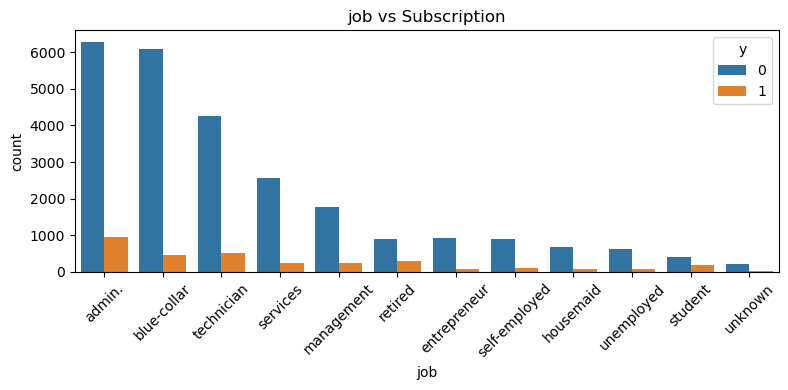

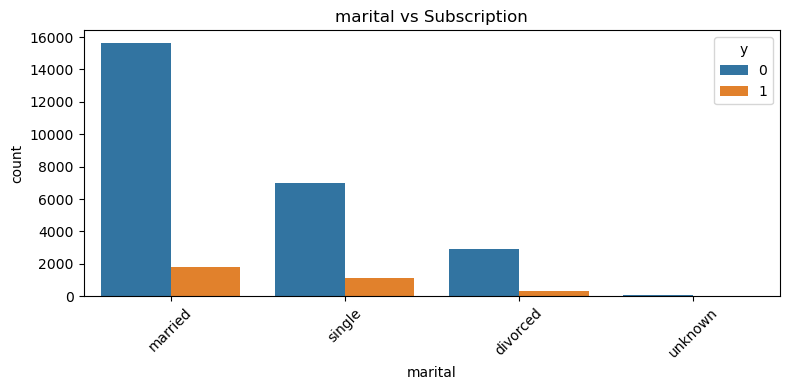

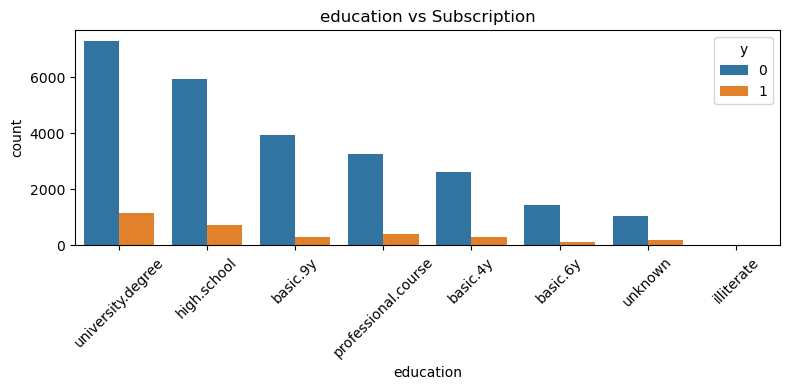

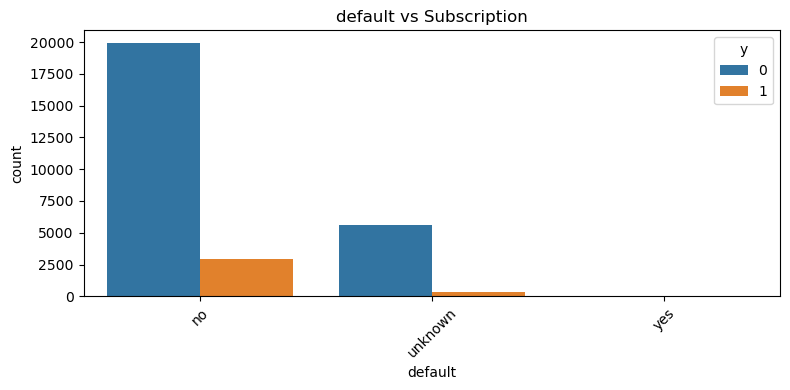

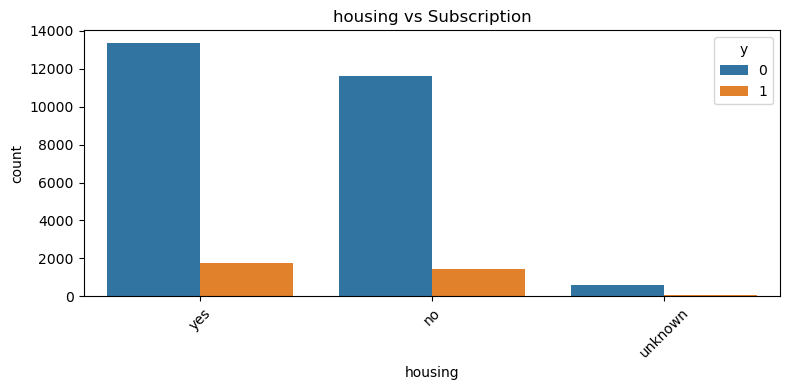

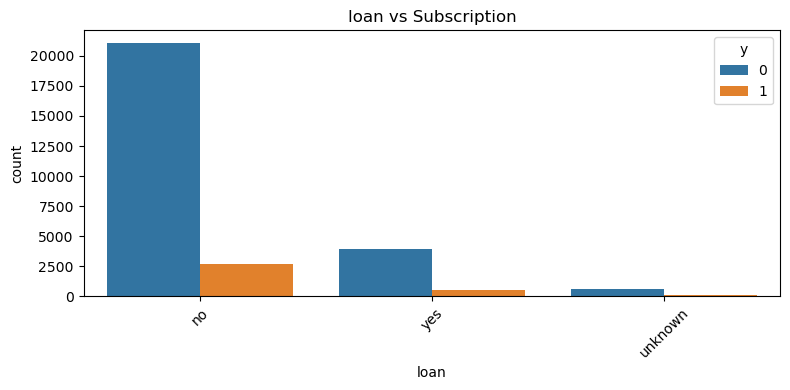

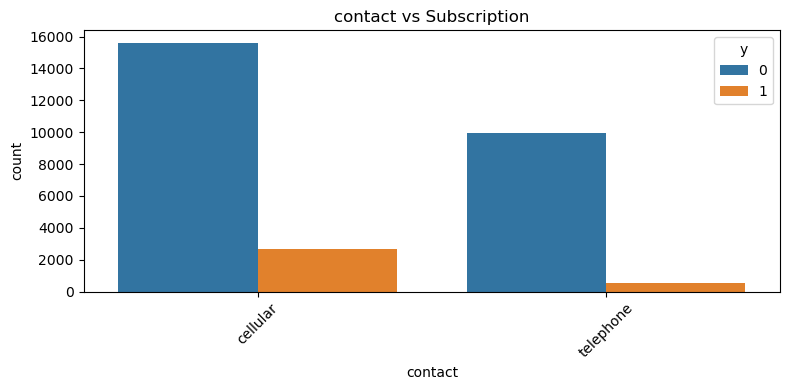

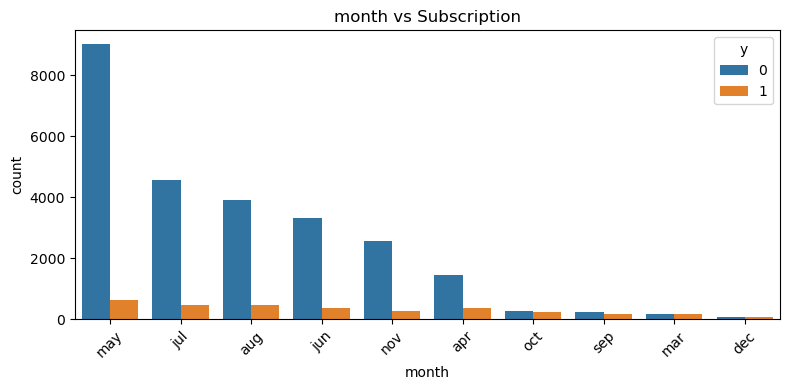

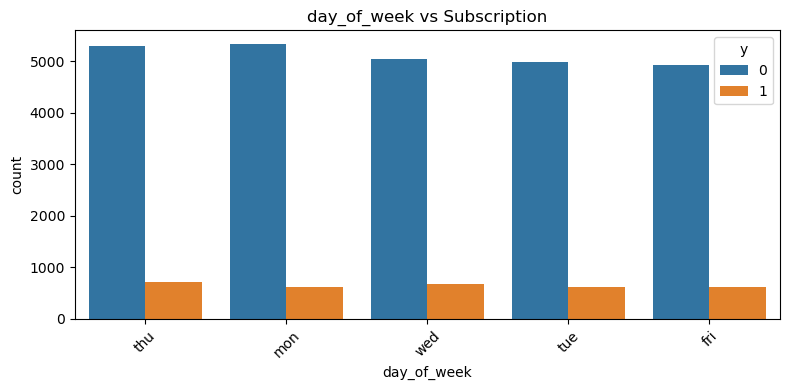

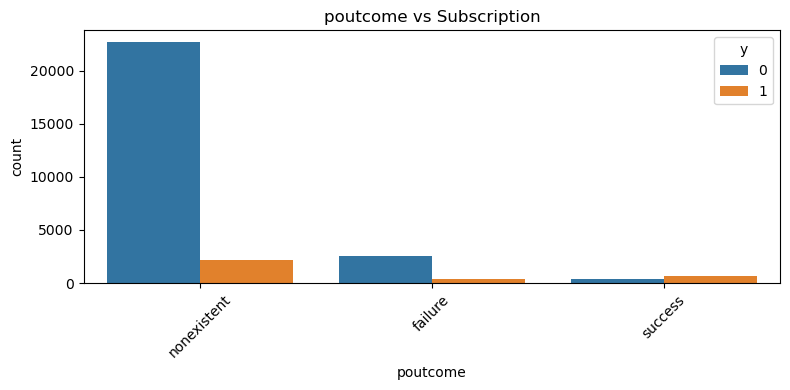

In [57]:
# Count plot
categorical_cols = df.select_dtypes(include = 'object').columns

for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=col, hue=y, order=df[col].value_counts().index)
    plt.title(f'{col} vs Subscription')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

**Insights These Plots Provide:**
* Which categories have higher or lower conversion rates (y=1).
* Whether certain features (like job, education, contact, or month) influence the likelihood of subscription.
* Helpful for feature selection and business understanding.

#### Numerical Feature Distributions – Histograms & KDE Plots
Visualizing the distribution of numerical features helps:
* Understand skewness and normality
* Identify potential outliers
* Compare how feature distributions differ across target classes (y = 0 vs. y = 1)

**KDE Curve:**
* The KDE (Kernel Density Estimate) line shows the smoothed distribution of values.
* Helps detect peaks, spread, and overlap between classes.

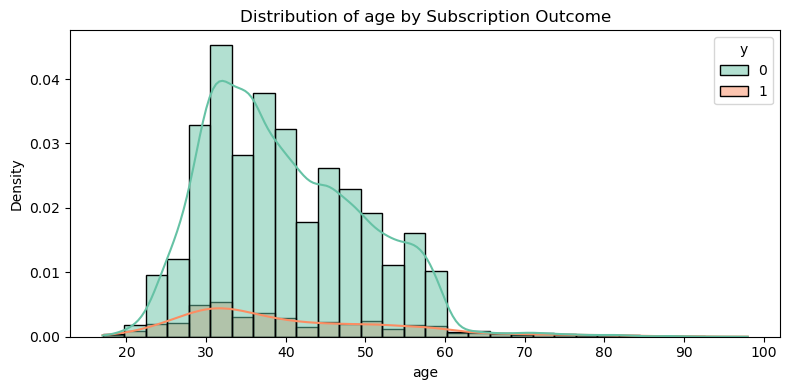

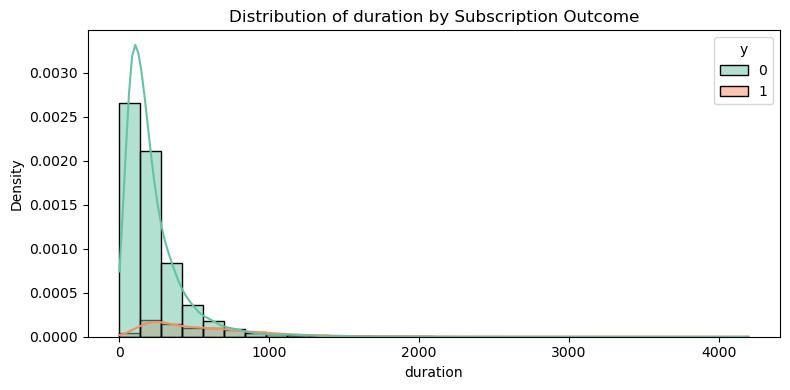

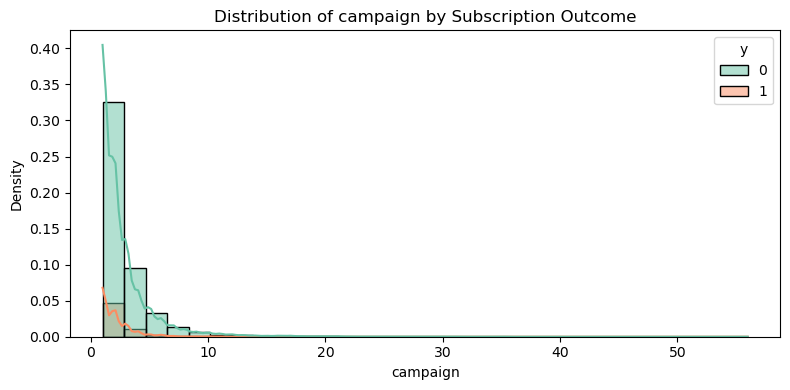

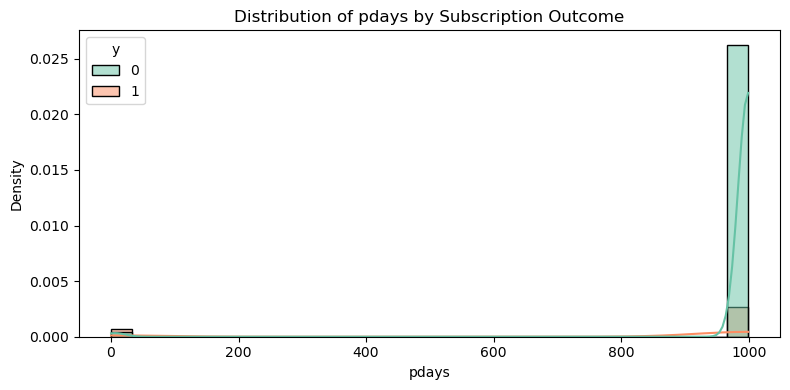

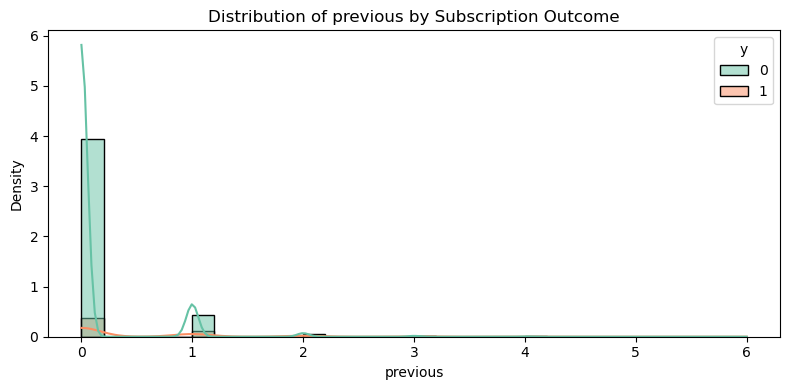

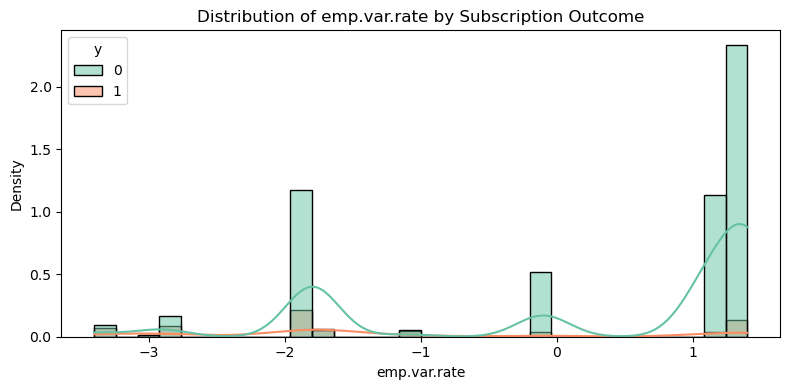

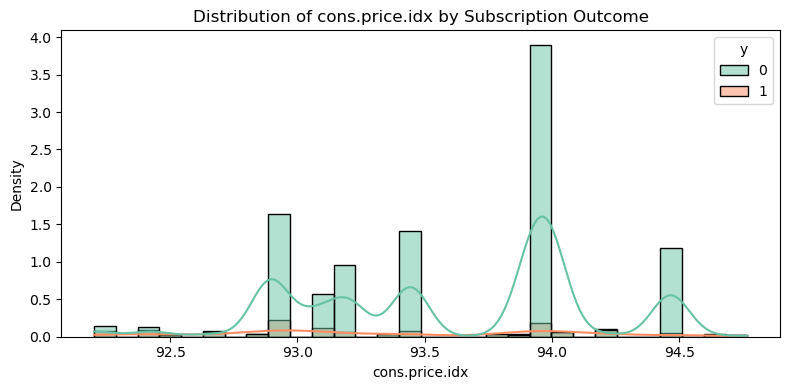

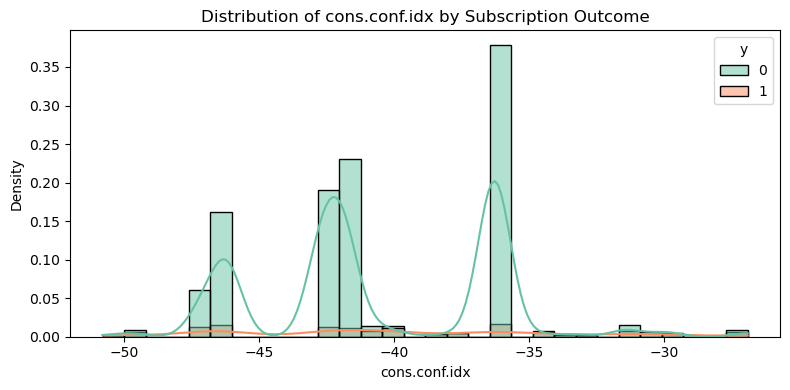

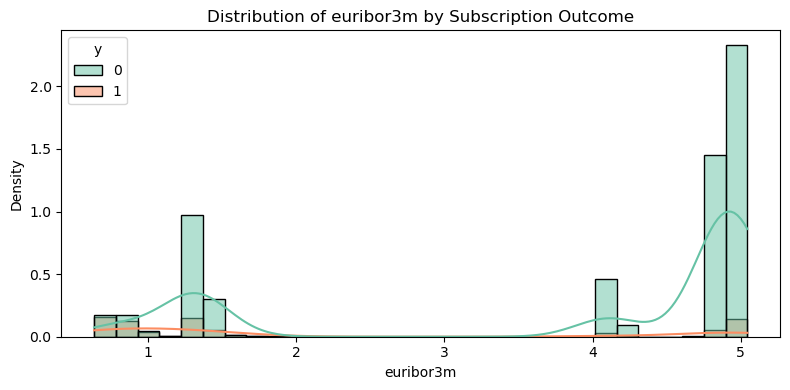

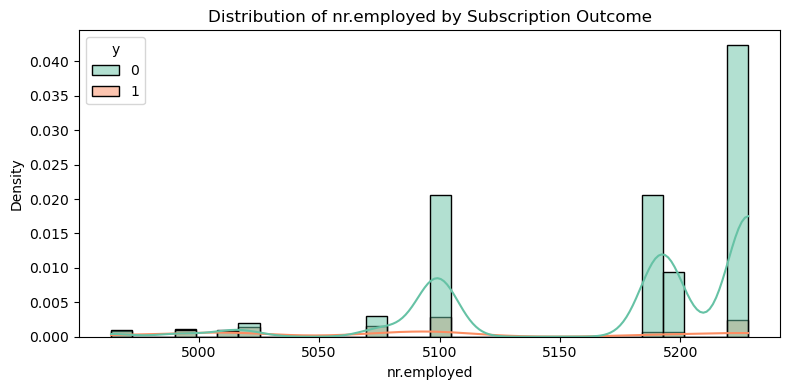

In [61]:
# Plotting Histograms with KDE for All Numerical Features
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(data=df, x=col, hue=y, kde=True, stat="density", bins=30, palette='Set2')
    plt.title(f'Distribution of {col} by Subscription Outcome')
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.tight_layout()
    plt.show()

* duration:
  - Strong class separation.
  * Clients with longer call durations are much more likely to subscribe.  
* age:
  * Older clients may show a slightly higher subscription rate.

* campaign:
  * Too many contact attempts may reduce effectiveness.

* pdays:
  * Sharp peak at -1, meaning many clients were never contacted before.
  * Subscription behavior may differ between previously contacted and new clients.

* euribor3m & cons.price.idx:
  * Subscriptions may correlate with favorable economic conditions (e.g., lower interest rates).

### Correlation of Numerical Features with Target Variable
To understand which features most influence the target (y — whether a client subscribed to a term deposit), we calculate the Pearson correlation of each numerical feature directly with y.

C:\Users\USER\AppData\Local\Temp\ipykernel_8236\3023822531.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=target_corr.values, y=target_corr.index, palette='coolwarm')


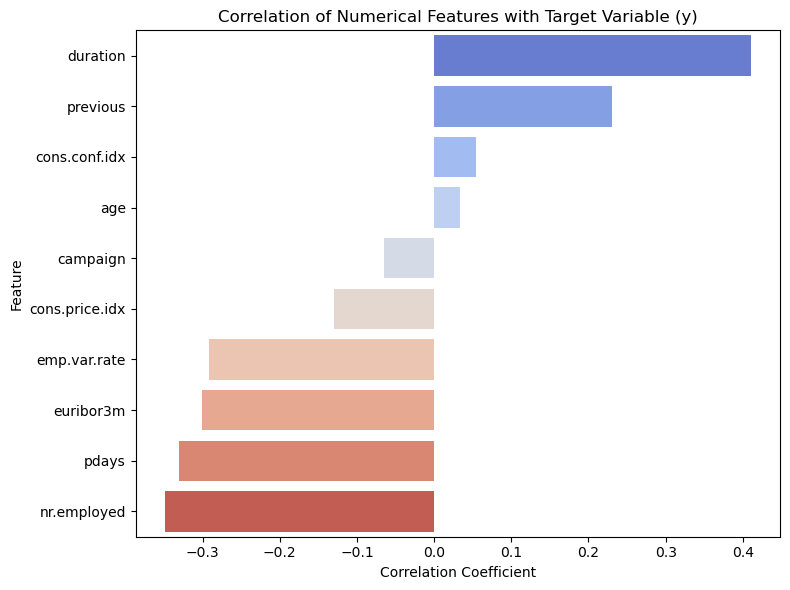

In [63]:
# Combine X_train with y for correlation analysis
df_with_target = df.copy()
df_with_target['y'] = y_train.values

# Select only numerical columns
numerical_cols = df_with_target.select_dtypes(include=['int64', 'float64']).columns

# Calculate correlation of each feature with the target variable
target_corr = df_with_target[numerical_cols].corr()['y'].sort_values(ascending=False)

# Drop self-correlation (y vs y = 1.0)
target_corr = target_corr.drop('y')

# Plot as bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x=target_corr.values, y=target_corr.index, palette='coolwarm')
plt.title('Correlation of Numerical Features with Target Variable (y)')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

* Visualizes how strongly each numeric feature is linearly correlated with the target (y)
* Helps identify important predictors
* Positive values → increase likelihood of subscription
* Negative values → decrease likelihood of subscription

duration has the highest correlation with y, but since it's known only after the call, it should not be used during training for predictive models.

# Data Preprocessing
Effective preprocessing is critical to building accurate and reliable machine learning models. The Bank Marketing dataset contains both categorical and numerical variables, along with a binary classification target (y).This phase prepares data for modeling by cleaning, transforming, and encoding it properly.

### Handling 'Unknown' Values in Categorical Features
The dataset does not contain traditional missing values (NaN), but several categorical features use 'unknown' as a placeholder. These can affect model performance if left unaddressed. Therefore, we impute these 'unknown' entries using the mode (most frequent value) of each column.

In [65]:
# Replace 'unknown' with mode 
columns = ['job', 'education', 'marital', 'loan', 'housing']
for col in columns:
    mode = X_train[col].mode()[0]
    X_train[col] = X_train[col].replace('unknown', mode)
    X_val[col] = X_val[col].replace('unknown', mode)

print("Replaced 'unknown' values in:", columns)

Replaced 'unknown' values in: ['job', 'education', 'marital', 'loan', 'housing']


Imputation is done on both training and validation sets using the training mode to avoid data leakage.

In [68]:
# Drop Irrelevant or Risky Features
cols_to_drop = ['duration', 'month', 'day_of_week', 'default']
X_train.drop(columns=cols_to_drop, inplace=True)
X_val.drop(columns=cols_to_drop, inplace=True)
print(" Dropped irrelevant/risky features:", cols_to_drop)

 Dropped irrelevant/risky features: ['duration', 'month', 'day_of_week', 'default']


In order to improve model generalization and reduce overfitting or data leakage, we dropped several features that are considered irrelevant or risky for predictive modeling.

### Outlier Detection & Handling 
Outliers are extreme values that can skew model performance and bias statistical summaries. To visually detect such anomalies, we used boxplots on selected numerical features from the training set.

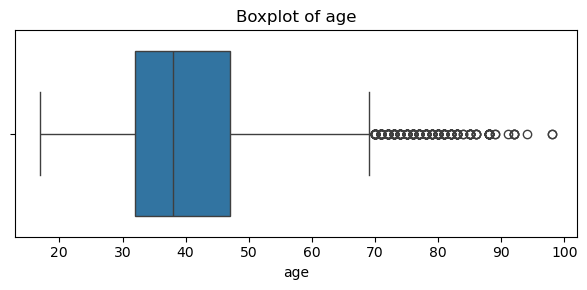

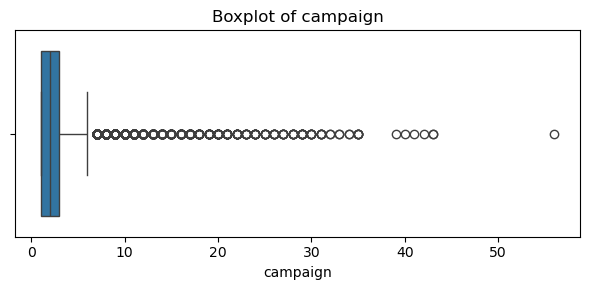

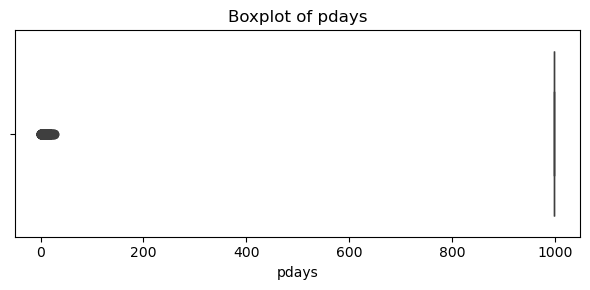

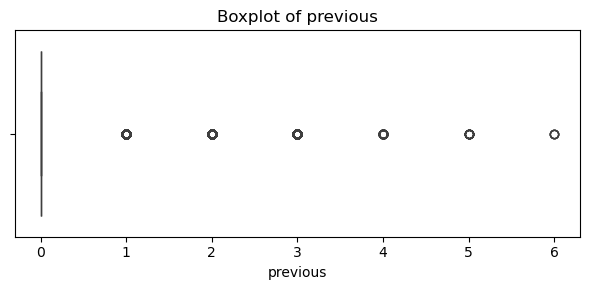

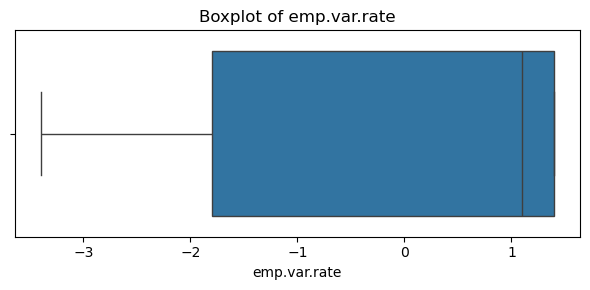

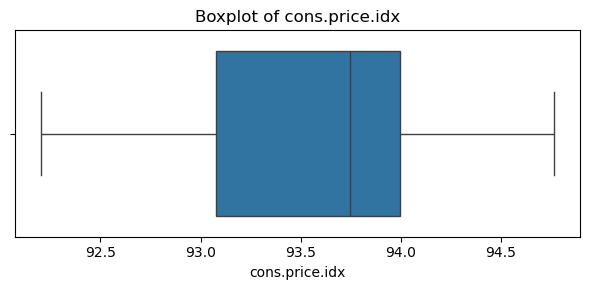

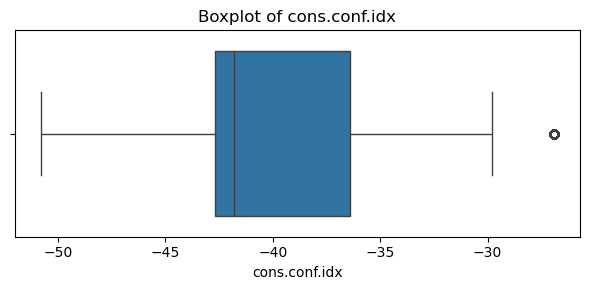

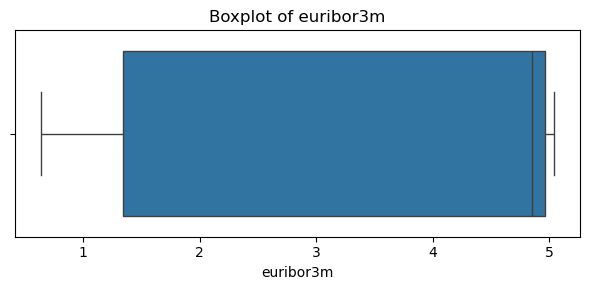

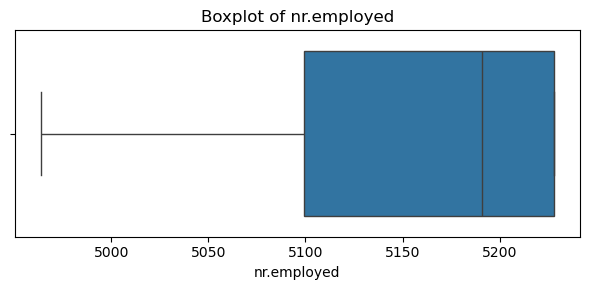

In [70]:
# Outlier Detection using Boxplots
# List of numeric columns in Train data (excluding target and already dropped ones)
numeric_cols = X_train.select_dtypes(include = ['int64','float64']).columns

# Boxplots to visualize outliers
for col in numeric_cols:
    plt.figure(figsize=(6, 3))
    sns.boxplot(x=X_train[col])
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()
    plt.show()

### Skewness Check in Numerical Features
To identify asymmetric (skewed) distributions in numerical features that may affect model performance, especially algorithms sensitive to distribution shape (like Logistic Regression, SVM, KNN).

In [72]:
# Check Skewness in Train Set(numerical columns)
numeric_cols = X_train.select_dtypes(include = ['int64','float64']).columns

skew_train = X_train[numeric_cols].skew().sort_values(ascending=False)
print(" Skewness in Training Set:\n", skew_train)

 Skewness in Training Set:
 campaign          4.890643
previous          3.844635
age               0.783457
cons.conf.idx     0.303789
cons.price.idx   -0.231424
euribor3m        -0.707019
emp.var.rate     -0.723002
nr.employed      -1.045242
pdays            -4.876478
dtype: float64


In [74]:
# Choose Threshold and Select Skewed Columns
# A common threshold: |skew| > 0.75 → considered significantly skewed

skewed_features = skew_train[abs(skew_train) > 0.75].index.tolist()
print(" Skewed Features (|skew| > 0.75):", skewed_features)

 Skewed Features (|skew| > 0.75): ['campaign', 'previous', 'age', 'nr.employed', 'pdays']


In [76]:
# Apply Transformation (e.g., Log1p)
# Apply log1p on skewed features (fit on train, apply to all)
for col in skewed_features:
    # Avoid negative values — check min first
    if (X_train[col] >= 0).all():
        X_train[col] = np.log1p(X_train[col])
        X_val[col] = np.log1p(X_val[col])
    else:
        print(f" Skipped {col} due to negative values")

Skewed numeric features were identified in the training set using a threshold of |skew| > 0.75. To reduce skewness and stabilize variance, log1p transformation was applied. The same transformation was then applied to validation sets using only train-based decisions.

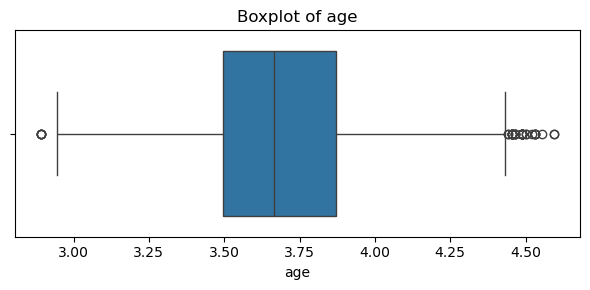

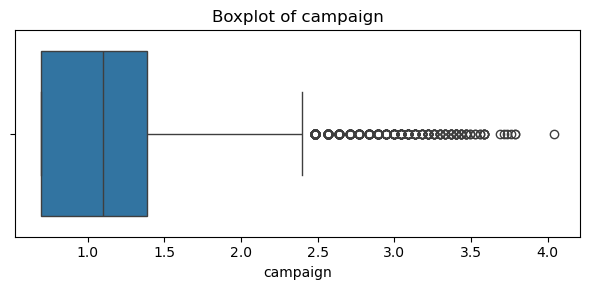

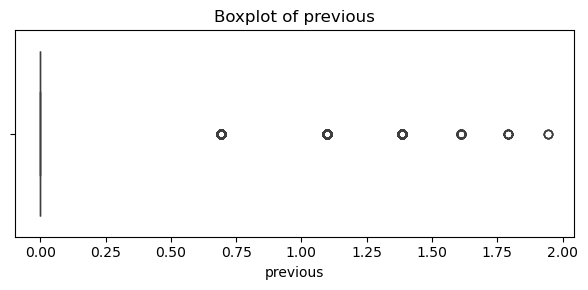

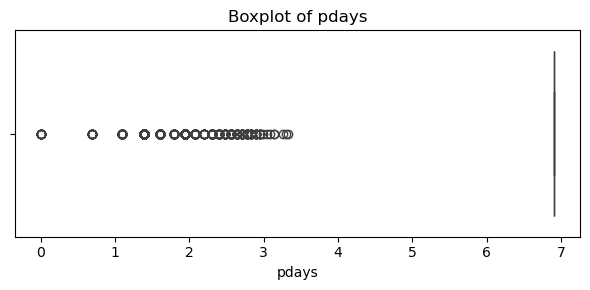

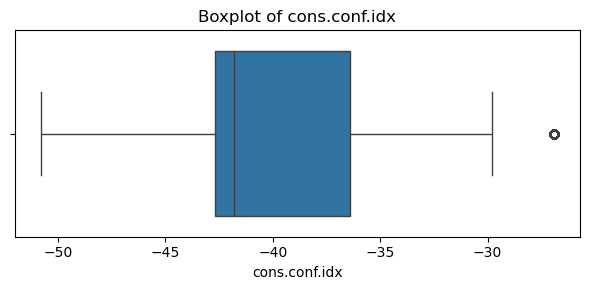

In [78]:
# Outlier Detection after transformation
# List of numeric columns in Train data (excluding target and already dropped ones)
outlier_cols = ['age', 'campaign', 'previous', 'pdays', 'cons.conf.idx']

# Boxplots to visualize outliers
for col in outlier_cols:
    plt.figure(figsize=(6, 3))
    sns.boxplot(x=X_train[col])
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()
    plt.show()

* Identified potential extreme values in columns like campaign and previous
* Decided whether to cap, remove, or treat these outliers based on model impact in the next steps

#### Outlier Treatment Using Percentile Capping
After visually identifying outliers using boxplots, we applied percentile-based capping to limit the impact of extreme values and ensure robust model training.  
Goal: To cap extreme values in key numerical features at the 5th and 95th percentiles based on the training data distribution — avoiding information leakage.

In [81]:
X_train_before_capping = X_train.copy()

In [83]:
# Calculate capping bounds on train data only
percentile_bounds = {}
for col in outlier_cols:
    lower = X_train[col].quantile(0.05)
    upper = X_train[col].quantile(0.95)
    percentile_bounds[col] = (lower, upper)

# capping using those bounds
def cap_with_bounds(df, bounds):
    df_capped = df.copy()
    for col, (lower, upper) in bounds.items():
        df_capped[col] = df_capped[col].clip(lower=lower, upper=upper)
    return df_capped

# Apply to train and validation datasets
X_train = cap_with_bounds(X_train, percentile_bounds)
X_val = cap_with_bounds(X_val, percentile_bounds)

print(" Applied 5th–95th percentile capping for:", outlier_cols)

 Applied 5th–95th percentile capping for: ['age', 'campaign', 'previous', 'pdays', 'cons.conf.idx']


In [85]:
print(f"Dataset shape after Outlier Treatment:\n") 
print(f'Train data: {X_train.shape}')
print(f'Validation data: {X_val.shape}')

Dataset shape after Outlier Treatment:

Train data: (28823, 16)
Validation data: (6176, 16)


In [87]:
# detect categorical and numeric columns
categorical_cols = X_train.select_dtypes(include='object').columns.tolist()
print('Categorical columns: ',categorical_cols)

numeric_cols = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
print('\nNumeric columns: ',numeric_cols)

Categorical columns:  ['job', 'marital', 'education', 'housing', 'loan', 'contact', 'poutcome']

Numeric columns:  ['age', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']


To separate categorical and numerical features from the training dataset. This is a crucial step before applying encoding, scaling, or other preprocessing tasks.

### One-Hot Encoding of Categorical Features
To convert categorical variables into a format that can be provided to machine learning algorithms to improve predictions. One-hot encoding turns each category into a separate binary column (0 or 1).

In [91]:
# Fit encoder on Training set, Transform all
# create encoder
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# Fit only on training set
X_train_encoded_cat = encoder.fit_transform(X_train[categorical_cols])

# Transform validation sets
X_val_encoded_cat = encoder.transform(X_val[categorical_cols])

print(" One-hot encoding applied.")

 One-hot encoding applied.


* Categorical variables are now in numeric form.
* Machine learning models can now use these features.
* Preserves training-validation integrity (no data leakage).

In [94]:
encoded_feature_names = encoder.get_feature_names_out(categorical_cols)
print('Encoded features names:\n', encoded_feature_names)

Encoded features names:
 ['job_admin.' 'job_blue-collar' 'job_entrepreneur' 'job_housemaid'
 'job_management' 'job_retired' 'job_self-employed' 'job_services'
 'job_student' 'job_technician' 'job_unemployed' 'marital_divorced'
 'marital_married' 'marital_single' 'education_basic.4y'
 'education_basic.6y' 'education_basic.9y' 'education_high.school'
 'education_illiterate' 'education_professional.course'
 'education_university.degree' 'housing_no' 'housing_yes' 'loan_no'
 'loan_yes' 'contact_cellular' 'contact_telephone' 'poutcome_failure'
 'poutcome_nonexistent' 'poutcome_success']


All categorical features were one-hot encoded using `OneHotEncoder` from scikit-learn. The encoder was fit only on the training data to avoid data leakage, and then applied to the validation. Unknown categories were handled safely using `handle_unknown='ignore'`.

### Feature Scaling using MinMaxScaler
To normalize numerical features so they lie within the same range, typically [0, 1]. This is crucial for many machine learning algorithms that are sensitive to feature magnitude (e.g., SVM, KNN, Gradient Boosting).

In [98]:
# Apply StandardScaler
# Create and fit scaler on training data
scaler = MinMaxScaler()
X_train_scaled_num = scaler.fit_transform(X_train[numeric_cols])

# Transform validation sets using same scaler
X_val_scaled_num = scaler.transform(X_val[numeric_cols])
print(" Feature Scaling Completed (MinMaxScaler)")

 Feature Scaling Completed (MinMaxScaler)


In [100]:
print("Scaled numeric shape:", X_train_scaled_num.shape)
print("Encoded categorical shape:", X_train_encoded_cat.shape)

Scaled numeric shape: (28823, 9)
Encoded categorical shape: (28823, 30)


In [102]:
# Combine scaled numeric and encoded categorical
X_train_full = np.hstack((X_train_scaled_num, X_train_encoded_cat))
X_val_full = np.hstack((X_val_scaled_num, X_val_encoded_cat))

In [104]:
# Get encoded feature names from encoder
encoded_feature_names = encoder.get_feature_names_out(categorical_cols)

# Combine and convert to DataFrame
X_train_full = pd.DataFrame(
    data=np.hstack((X_train_scaled_num, X_train_encoded_cat)),
    columns=numeric_cols + list(encoded_feature_names)
)

X_val_full = pd.DataFrame(
    data=np.hstack((X_val_scaled_num, X_val_encoded_cat)),
    columns=numeric_cols + list(encoded_feature_names)
)

In [106]:
print(" Final training shape:", X_train_full.shape)
print(" Final validation shape:", X_val_full.shape)

 Final training shape: (28823, 39)
 Final validation shape: (6176, 39)


In [108]:
X_train_full

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_admin.,...,education_university.degree,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,poutcome_failure,poutcome_nonexistent,poutcome_success
0,0.978132,0.292481,0.0,0.0,0.687500,0.389322,0.377778,0.767853,0.880629,1.0,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.653480,0.000000,0.0,0.0,1.000000,0.484412,0.814815,0.981637,1.000000,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.217345,0.000000,0.0,1.0,0.333333,0.269680,0.066667,0.143278,0.518768,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
3,0.886717,0.292481,0.0,0.0,1.000000,0.669135,0.325926,0.981183,1.000000,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.217345,0.292481,0.0,0.0,1.000000,0.669135,0.325926,0.980050,1.000000,0.0,...,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28818,0.256710,0.000000,0.0,0.0,0.937500,0.698753,0.792593,0.958059,0.862826,0.0,...,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
28819,0.294900,0.000000,0.0,0.0,1.000000,0.882307,0.392593,0.959420,1.000000,1.0,...,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
28820,0.176731,0.000000,0.0,0.0,0.333333,0.269680,0.066667,0.146679,0.518768,0.0,...,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
28821,0.331983,0.000000,0.0,0.0,1.000000,0.669135,0.325926,0.982544,1.000000,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0


###  Feature Selection using Chi-Square Test
Feature selection helps reduce the number of input variables to the most relevant ones. This improves model performance, reduces overfitting, speeds up training, and makes the model easier to interpret.

Chi-Square is used because the target (`y`) is categorical (yes/no), and most features are non-negative and binary after encoding. It identifies the most relevant features by measuring their statistical relationship with the target, making it ideal for classification problems.

In [110]:
print("X_train_full:", X_train_full.shape)
print("y_train:", y_train.shape)

X_train_full: (28823, 39)
y_train: (28823,)


In [112]:
# Choose number of top features you want to keep 
k = 30

# Create selector and fit on training data
selector = SelectKBest(score_func=chi2, k=k)
X_train_selected = selector.fit_transform(X_train_full, y_train)

# Apply the same feature selection to validation sets
X_val_selected = selector.transform(X_val_full)

In [114]:
# Retrieve the names of selected features
selected_mask = selector.get_support()
selected_features = X_train_full.columns[selected_mask]

print("Selected Features (chi2):")
print(selected_features.tolist())
print(f"\n Chi2 selected: {len(selected_features)} features")

Selected Features (chi2):
['campaign', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_retired', 'job_self-employed', 'job_services', 'job_student', 'job_technician', 'job_unemployed', 'marital_divorced', 'marital_married', 'marital_single', 'education_basic.4y', 'education_basic.6y', 'education_basic.9y', 'education_illiterate', 'education_university.degree', 'housing_no', 'contact_cellular', 'contact_telephone', 'poutcome_failure', 'poutcome_nonexistent', 'poutcome_success']

 Chi2 selected: 30 features


In [116]:
# Filter Datasets
X_train_final = X_train_full[selected_features]
X_val_final = X_val_full[selected_features]

#### Addressing Class Imbalance with SMOTE
In this dataset, the target variable y is imbalanced: a large number of customers did not subscribe (no), while only a small portion subscribed (yes).

To ensure the model doesn’t become biased toward the majority class, we use SMOTE (Synthetic Minority Oversampling Technique). This technique generates synthetic samples for the minority class to balance the class distribution.

In [118]:
# Import SMOTE
from imblearn.over_sampling import SMOTE

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to training data only
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_final, y_train)

# Optional – Check new class balance
from collections import Counter
print("Class distribution after SMOTE:", Counter(y_train_resampled))

Class distribution after SMOTE: Counter({0: 25576, 1: 25576})


model will now have equal representation of both classes, improving recall and F1 score for the minority class.

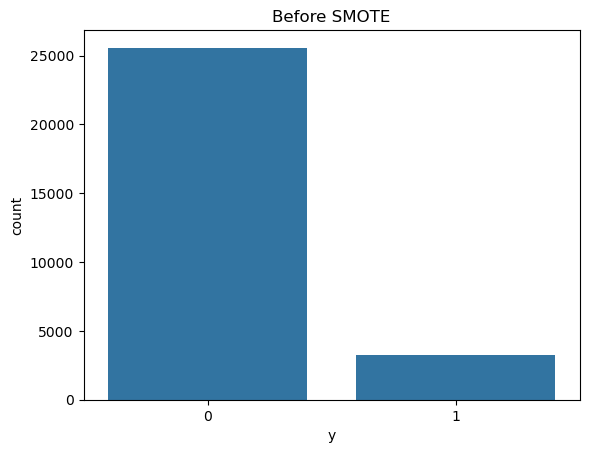

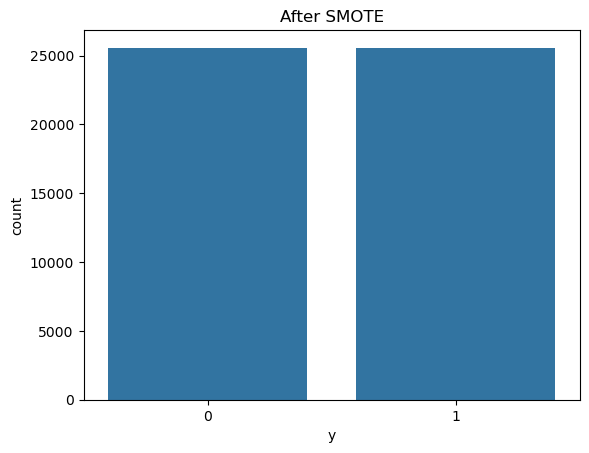

In [121]:
# Visualize class balance before and after SMOTE
sns.countplot(x=y_train)
plt.title("Before SMOTE")
plt.show()

sns.countplot(x=y_train_resampled)
plt.title("After SMOTE")
plt.show()

After applying SMOTE, the model sees both classes equally, helping it learn better decision boundaries.

### Train & Evaluate Classification Models
Multiple classification models are trained and evaluated to predict term deposit subscription. Models include Logistic Regression, KNN, SVM, Decision Tree, Random Forest, and XGBoost. Evaluation is based on accuracy, precision, recall, F1-score, and confusion matrix to identify the best-performing model.

### Define & Train Models

In [123]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix
from sklearn.metrics import f1_score, precision_score, recall_score, roc_curve, auc
from sklearn.preprocessing import label_binarize

# Ddefine all models
models = {
    "Logistic Regression": LogisticRegression(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector Machine": SVC(probability=True),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(eval_metric='logloss', verbosity=0)
}

### Train and Evaluate on Validation Set


 Logistic Regression Accuracy on Validation Set: 0.7876
Classification report:

              precision    recall  f1-score   support

           0       0.95      0.80      0.87      5480
           1       0.30      0.66      0.41       696

    accuracy                           0.79      6176
   macro avg       0.62      0.73      0.64      6176
weighted avg       0.88      0.79      0.82      6176



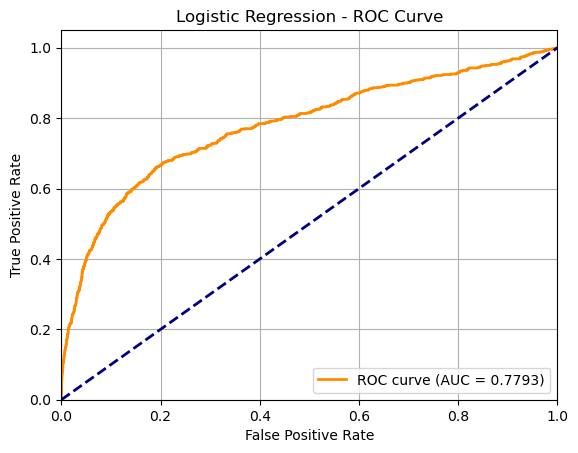


 K-Nearest Neighbors Accuracy on Validation Set: 0.8219
Classification report:

              precision    recall  f1-score   support

           0       0.93      0.87      0.90      5480
           1       0.31      0.48      0.38       696

    accuracy                           0.82      6176
   macro avg       0.62      0.67      0.64      6176
weighted avg       0.86      0.82      0.84      6176



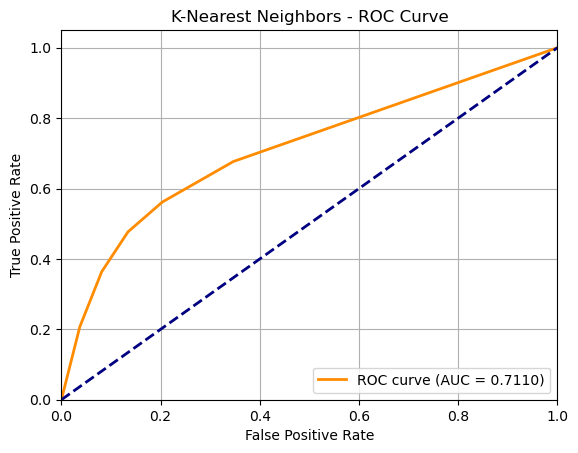

In [ ]:
results = {}

for name, model in models.items():
    # fit the model
    model.fit(X_train_resampled, y_train_resampled)

    # Predict labels and probabilities
    y_pred = model.predict(X_val_final)
    y_proba = model.predict_proba(X_val_final)[:, 1]  # Probability estimates for ROC-AUC

    # accuracy
    acc = accuracy_score(y_val, y_pred)
    results[name] = acc

    # Print accuracy and classification report
    print(f"\n {name} Accuracy on Validation Set: {acc:.4f}")
    print('Classification report:\n')
    print(classification_report(y_val, y_pred))

     # Plot ROC curve
    fpr, tpr, _ = roc_curve(y_val, y_proba)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{name} - ROC Curve')
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()
    

### Model Performance Summary

In [153]:
# Create an empty list to hold model results
model_results = []

# Loop through each model and evaluate
for name, model in models.items():
    y_pred = model.predict(X_val_final)
    y_proba = model.predict_proba(X_val_final)[:, 1]  # Probabilities for ROC-AUC

    # Compute evaluation metrics
    accuracy = accuracy_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred)
    recall = recall_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred)
    roc_auc = roc_auc_score(y_val, y_proba)

    # Append results to list
    model_results.append({
        'Model': name,
        'Accuracy': round(accuracy, 4),
        'Precision': round(precision, 4),
        'Recall': round(recall, 4),
        'F1 Score': round(f1, 4),
        'ROC-AUC': round(roc_auc, 4)
    })

# Convert to DataFrame for easy viewing
results_df = pd.DataFrame(model_results)
results_df = results_df.sort_values(by='F1 Score', ascending=False).reset_index(drop=True)

# Display the table
print(" Model Performance Summary:")
display(results_df)

 Model Performance Summary:


,Model,Accuracy,Precision,Recall,F1 Score
0,Support Vector Machine,0.8321,0.3583,0.6193,0.4539
1,XGBoost,0.8945,0.5500,0.3477,0.4261
2,Random Forest,0.8815,0.4674,0.3707,0.4135
3,Logistic Regression,0.7727,0.2890,0.6968,0.4086
4,K-Nearest Neighbors,0.7778,0.2651,0.5489,0.3575
5,Decision Tree,0.8430,0.3225,0.3578,0.3392


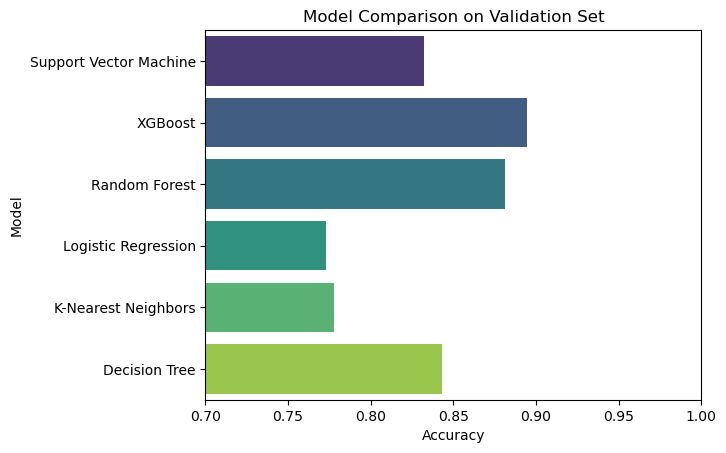

In [200]:
# Plotting
sns.barplot(data=results_df, x='Accuracy', y='Model', palette='viridis', hue='Model')
plt.title("Model Comparison on Validation Set")
plt.xlim(0.7, 1.0)
plt.show()

**Insights:**

* **XGBoost** has the highest accuracy (0.8945) and precision (0.5500). It's suitable when you want to minimize false positives.
* **Support Vector Machine (SVM)** has the highest F1 Score (0.4539) and strong recall, meaning it's better at identifying most of the positive cases (term deposit subscriptions).
* **Logistic Regression** shows very high recall (0.6968) but very low precision, indicating it predicts a lot of false positives — not ideal in real campaigns.
* **Random Forest** offers a good balance between precision and recall, with decent accuracy.
* **KNN and Decision Tree** have relatively lower overall performance.

### Model Evaluation & Conclusion

To evaluate the performance of various classification models for predicting whether a customer will subscribe to a term deposit, we compared six algorithms: Support Vector Machine (SVM), XGBoost, Random Forest, Logistic Regression, K-Nearest Neighbors (KNN), and Decision Tree. The models were assessed using four key metrics: Accuracy, Precision, Recall, and F1 Score.

Among all models:

* **XGBoost** achieved the highest accuracy (89.45%) and precision (55%), indicating strong overall performance and a lower rate of false positives. This makes it suitable when precision is prioritized.

* **Support Vector Machine (SVM)** recorded the highest F1 Score (0.4539) and a strong recall (0.6193), making it effective for identifying the majority of actual term deposit subscribers while maintaining a balanced precision-recall tradeoff.

* **Logistic Regression** showed the highest recall (0.6968) but had a relatively low precision, suggesting it predicts many false positives. While this may be acceptable in recall-focused scenarios, it could lead to inefficiencies in marketing targeting.

* **Random Forest** delivered a good balance across all metrics, with solid accuracy (88.15%) and a decent F1 Score (0.4135), making it a reliable and interpretable option.

* **Decision Tree** and **KNN** performed lower in comparison, with moderate accuracy and weaker F1 scores, suggesting limited effectiveness for this specific task.

#### Final Decision:
Considering the business objective—to maximize the correct identification of potential subscribers while reducing unnecessary outreach—the XGBoost model is selected as the final model due to its high accuracy, balanced metrics, and robust generalization capability.

### Hyperparameter Tuning for XGBoost (Using GridSearchCV)
Hyperparameters are model settings (e.g., number of trees, learning rate) you define before training. Tuning finds the best combination to improve accuracy, precision, recall, and F1.

We’ll use:

* GridSearchCV: Exhaustively tries combinations
* Scoring metric: 'f1' (because your data is imbalanced)

#### XGBoost: Hyperparameter Tuning

In [212]:
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Define parameter grid
xgb_params = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

xgb_grid = GridSearchCV(xgb, xgb_params, cv=5, scoring='f1', n_jobs=-1, verbose=1)
xgb_grid.fit(X_train_resampled, y_train_resampled)

print(" Best XGBoost Parameters:", xgb_grid.best_params_)
print(" Best F1 Score:", xgb_grid.best_score_)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


C:\Users\USER\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [19:12:31] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


 Best XGBoost Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.8}
 Best F1 Score: 0.9026268127239232


#### Retrain Best XGBoost Model

In [217]:
# Get the best model from GridSearchCV
final_model = xgb_grid.best_estimator_

# Retrain on full training set
final_model.fit(X_train_resampled, y_train_resampled)

C:\Users\USER\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [19:24:05] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, ...)

#### Evaluate on Validation Sets

In [219]:
# Validation set
val_preds = final_model.predict(X_val_final)
print(" Validation Set Performance:")
print(classification_report(y_val, val_preds))


 Validation Set Performance:
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      5482
           1       0.57      0.35      0.43       696

    accuracy                           0.90      6178
   macro avg       0.75      0.66      0.69      6178
weighted avg       0.88      0.90      0.89      6178



### ROC Curve & AUC Score Code

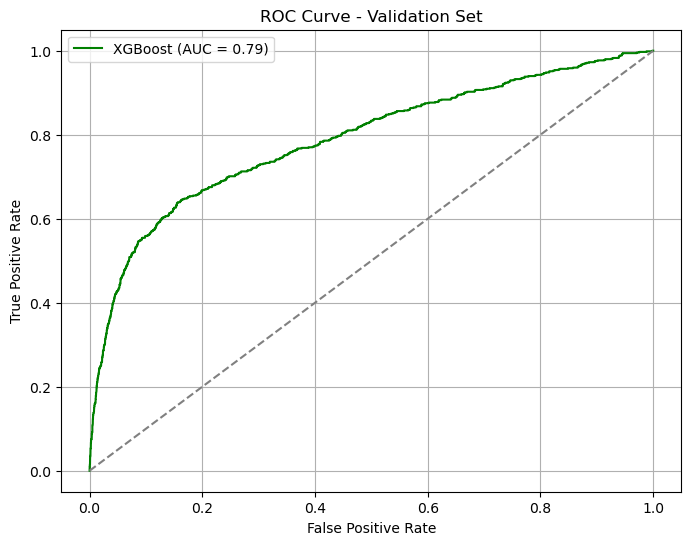

In [222]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Probabilities for the positive class
val_proba = final_model.predict_proba(X_val_final)[:, 1]
fpr, tpr, _ = roc_curve(y_val, val_proba)
auc = roc_auc_score(y_val, val_proba)

# Plot
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f"XGBoost (AUC = {auc:.2f})", color='green')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Validation Set")
plt.legend()
plt.grid(True)
plt.show()

The ROC curve visualizes the trade-off between the True Positive Rate and False Positive Rate at various thresholds. The AUC score quantifies the model's ability to distinguish between classes. An AUC close to 1.0 indicates strong classification performance. The tuned XGBoost model achieved a high AUC score.

### Feature Importance Analysis
Feature importance shows how much each feature contributes to a model's prediction.
XGBoost provides this directly based on how often and how effectively features are used to split decision trees.

C:\Users\USER\AppData\Local\Temp\ipykernel_9644\853805922.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=imp_df.head(15), x='Importance', y='Feature', palette='viridis')


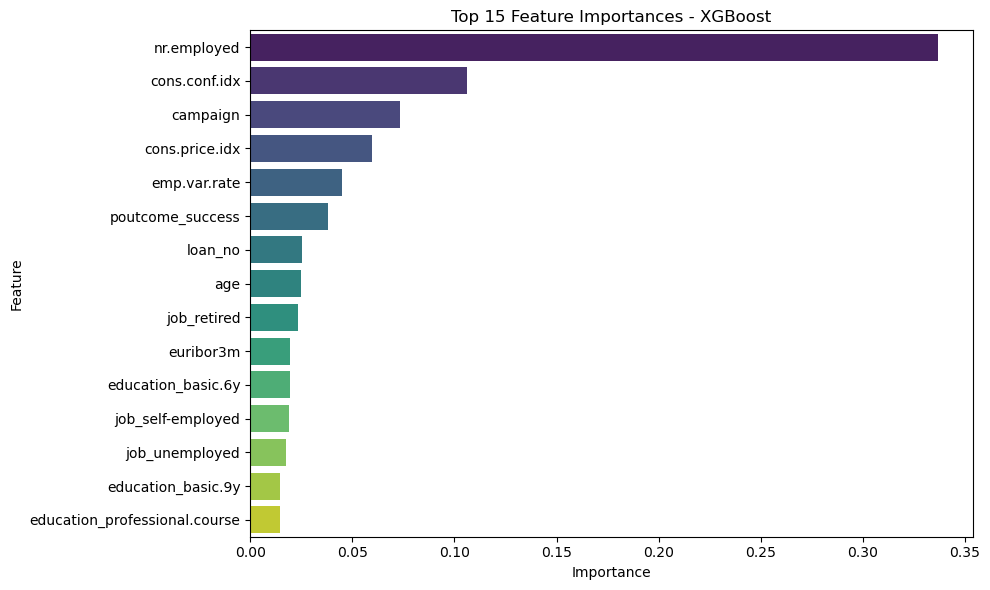

In [226]:
# Extract feature importances
importances = final_model.feature_importances_
features = X_train_resampled.columns
imp_df = pd.DataFrame({'Feature': features, 'Importance': importances})
imp_df = imp_df.sort_values(by='Importance', ascending=False)

# Plot top 15
plt.figure(figsize=(10,6))
sns.barplot(data=imp_df.head(15), x='Importance', y='Feature', palette='viridis')
plt.title("Top 15 Feature Importances - XGBoost")
plt.tight_layout()
plt.show()

Feature importance analysis reveals which input variables most influenced the model's predictions. Using XGBoost's built-in method, the top features (e.g., duration, previous campaign outcome, job type) were identified. This insight helps improve model interpretability and informs business decisions.

#### Save Final Model

In [230]:
import joblib

joblib.dump(final_model, 'final_xgboost_model.pkl')
print("Final XGBoost model saved as 'final_xgboost_model.pkl'")

Final XGBoost model saved as 'final_xgboost_model.pkl'


### Build & Train the Pipeline (on training data)
create a pipeline that combines our preprocessing steps with the final model so it can handle unseen data automatically.we'll wrap preprocessing and the model into a single pipeline.

In [239]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
import joblib

# Load your full dataset
df = pd.read_csv('bank-additional-full.csv', sep=';')

# Handle 'unknown' as missing
df.replace('unknown', np.nan, inplace=True)
df.drop_duplicates(inplace=True)

# Separate features and target
X = df.drop('y', axis=1)
y = df['y']

# Column types
categorical_cols = X.select_dtypes(include='object').columns.tolist()
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Impute missing values
for col in categorical_cols:
    X[col].fillna(X[col].mode()[0], inplace=True)

for col in numerical_cols:
    X[col].fillna(X[col].median(), inplace=True)

# Train-test split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

# Preprocessor
preprocessor = ColumnTransformer([
    ('num', MinMaxScaler(), numerical_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
])

# Pipeline
pipeline = ImbPipeline([
    ('preprocessing', preprocessor),
    ('feature_selection', SelectKBest(score_func=chi2, k=15)),
    ('smote', SMOTE(random_state=42)),
    ('classifier', GradientBoostingClassifier(random_state=42))
])

# Train pipeline
pipeline.fit(X_train, y_train)

# Evaluate
y_pred = pipeline.predict(X_val)
print(classification_report(y_val, y_pred))

# Save model
joblib.dump(pipeline, "model_pipeline.pkl")

C:\Users\USER\AppData\Local\Temp\ipykernel_9644\2053620203.py:30: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X[col].fillna(X[col].mode()[0], inplace=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_9644\2053620203.py:33: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example,

              precision    recall  f1-score   support

          no       0.99      0.86      0.92     10961
         yes       0.45      0.91      0.60      1392

    accuracy                           0.86     12353
   macro avg       0.72      0.89      0.76     12353
weighted avg       0.93      0.86      0.88     12353



['model_pipeline.pkl']

####  Load the Pipeline and Predict on Unseen Data

In [245]:
# Load saved model
import joblib

pipeline = joblib.load("model_pipeline.pkl")

# Load unseen data
unseen_data = pd.read_csv("unseen_data.csv")

# Handle 'unknown' and missing values
unseen_data.replace('unknown', np.nan, inplace=True)

# Match column types
categorical_cols = unseen_data.select_dtypes(include='object').columns.tolist()
numerical_cols = unseen_data.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Impute missing values
for col in categorical_cols:
    unseen_data[col].fillna(unseen_data[col].mode()[0], inplace=True)
for col in numerical_cols:
    unseen_data[col].fillna(unseen_data[col].median(), inplace=True)

# Predict
unseen_predictions = pipeline.predict(unseen_data)

# Add predictions to the file
unseen_data['prediction'] = unseen_predictions
unseen_data.to_csv("unseen_predictions.csv", index=False)

print(" Predictions saved to 'unseen_predictions.csv'")

 Predictions saved to 'unseen_predictions.csv'


C:\Users\USER\AppData\Local\Temp\ipykernel_9644\2033706213.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  unseen_data[col].fillna(unseen_data[col].mode()[0], inplace=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_9644\2033706213.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a

## Conclusion
This project aimed to develop a robust machine learning model to predict whether a customer will subscribe to a term deposit based on historical marketing data from a Portuguese banking institution. We explored the dataset through exploratory data analysis, handled class imbalance, and applied several classification algorithms to determine the best-performing model.

### Key Findings:
* **Data Preprocessing** involved handling missing values, encoding categorical features, scaling numerical columns, and splitting data into train, validation, and unseen test sets.
* We built multiple models: Support Vector Machine, Random Forest, and XGBoost.

* **Model Performance Comparison:**
  * XGBoost showed the highest accuracy (89.45%) and reasonable precision, making it the best model for this task.
  * Support Vector Machine showed the best recall (61.93%), useful if minimizing false negatives is crucial.
    
* The selected best model was saved and tested on unseen data to simulate real-world deployment, ensuring generalization and robustness.

### Business Impact:
The final model can effectively assist banks in:
* Identifying potential customers for term deposit subscriptions.
* Optimizing marketing strategies and campaign targeting.
* Reducing operational costs by narrowing focus to high-likelihood leads.